In [1]:
import sys
import os
import numpy as np
import warnings
import geopandas as gpd
import folium

C:\Users\AcerUser\PycharmProjects\Urban_data_analysis\venv\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
from CityGeoTools.metrics.data import CityInformationModel as BaseModel
from CityGeoTools.metrics.calculations import utils
warnings.simplefilter(action='ignore')

city_model = BaseModel.CityInformationModel(city_name="Kaliningrad", city_crs=32634, cwd="../")
print(city_model)

In [4]:
from CityGeoTools.data_specification.accessibility_isochrones import mobility_graph

In [7]:
city_model.update_layer("MobilityGraph", "./graph.graphml")

Validation of MobilityGraph layer...
MobilityGraph layer loaded successfully!


In [24]:
from CityGeoTools.metrics.calculations import mobility_analysis

# project point from EPSG 4326 to EPSG 32636

point = [[54.722642, 20.514075]]
point = utils.request_points_project(point, set_crs=4326, to_crs=32636)[0]

if city_model.methods.if_method_available("mobility_analysis"):
    walk_accessibility_zone = mobility_analysis.AccessibilityIsochrones(city_model).get_accessibility_isochrone(
        travel_type="walk",
        x_from=point[0], 
        y_from=point[1],
        weight_type = "time_min",
        weight_value = 10)
    walk_isochrone = gpd.GeoDataFrame.from_features(walk_accessibility_zone["isochrone"]).set_crs(4326)

In [25]:
map = folium.Map(location = [54.722642, 20.514075], zoom_start = 15, tiles='CartoDB positron')
folium.GeoJson(data=walk_isochrone, style_function=lambda x: {'fillColor': 'pink'}).add_to(map)
folium.Marker([54.722642, 20.514075]).add_to(map)
map

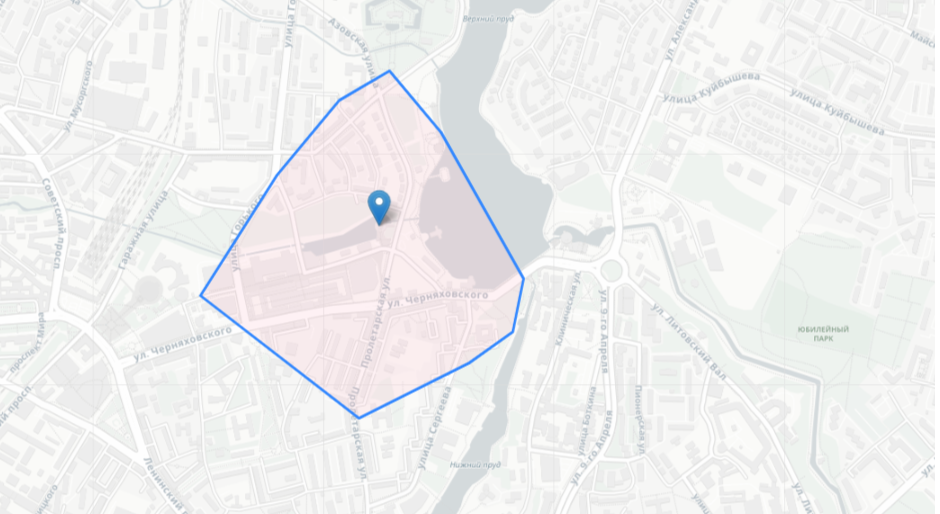

In [39]:
from IPython.display import Image, display
display(Image(filename='./src/3.png', embed=True))

In [26]:
from CityGeoTools.metrics.calculations import mobility_analysis

# project point from EPSG 4326 to EPSG 32636

point = [[54.722642, 20.514075]]
point = utils.request_points_project(point, set_crs=4326, to_crs=32636)[0]

if city_model.methods.if_method_available("mobility_analysis"):
    drive_accessibility_zone = mobility_analysis.AccessibilityIsochrones(city_model).get_accessibility_isochrone(
        travel_type="drive",
        x_from=point[0], 
        y_from=point[1],
        weight_type = "time_min",
        weight_value = 5)
    drive_isochrone = gpd.GeoDataFrame.from_features(drive_accessibility_zone["isochrone"]).set_crs(4326)

In [29]:
map = folium.Map(location = [54.722642, 20.514075], zoom_start = 14, tiles='CartoDB positron')
folium.GeoJson(data=drive_isochrone, style_function=lambda x: {'fillColor': 'orange'}).add_to(map)
folium.Marker([54.722642, 20.514075]).add_to(map)
map

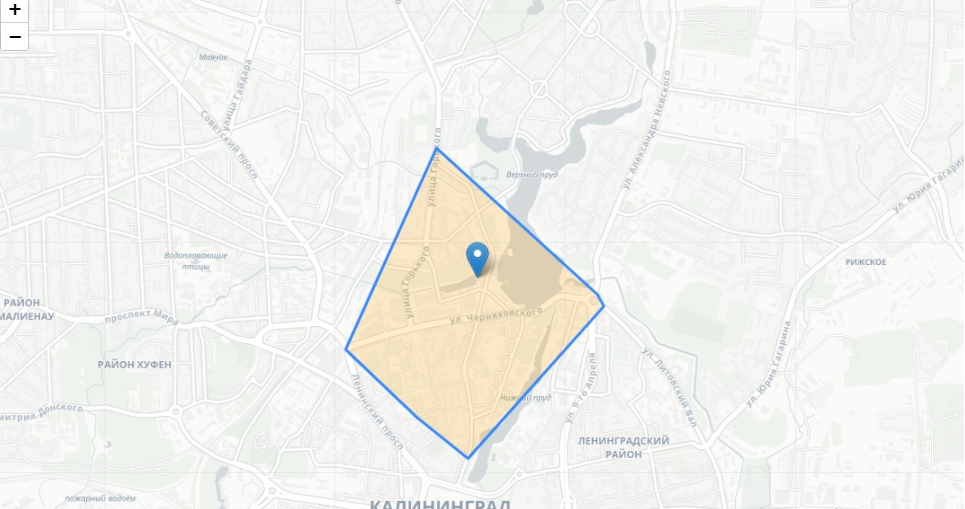

In [40]:
from IPython.display import Image, display
display(Image(filename='./src/1.png', embed=True))

In [31]:
from CityGeoTools.metrics.calculations import mobility_analysis

# project point from EPSG 4326 to EPSG 32636

point = [[54.722642, 20.514075]]
point = utils.request_points_project(point, set_crs=4326, to_crs=32636)[0]

if city_model.methods.if_method_available("mobility_analysis"):
    pt_accessibility_zone = mobility_analysis.AccessibilityIsochrones(city_model).get_accessibility_isochrone(
        travel_type="public_transport",
        x_from=point[0], 
        y_from=point[1],
        weight_type = "time_min",
        weight_value = 20,
        routes=True)
    pt_isochrone = gpd.GeoDataFrame.from_features(pt_accessibility_zone["isochrone"]).set_crs(4326)
    pt_stops = gpd.GeoDataFrame.from_features(pt_accessibility_zone["stops"]).set_crs(4326)
    pt_routes = gpd.GeoDataFrame.from_features(pt_accessibility_zone["routes"]).set_crs(4326)

In [32]:
map = folium.Map(location = [54.722642, 20.514075], zoom_start = 13, tiles='CartoDB positron')
transport_color = {'tram': 'red', 'bus': 'orange', 'trolleybus': 'purple', 'subway':'green'}
style_function = lambda x: {'color': transport_color[x['properties']['type']], 'weight': 1}

folium.GeoJson(data=pt_isochrone, style_function=lambda x: {'fillColor': 'pink'}).add_to(map)
folium.GeoJson(data=pt_routes, style_function=style_function).add_to(map)
folium.GeoJson(data=pt_stops, marker=folium.CircleMarker(fill_color="blue", fill_opacity=1, radius=1)).add_to(map)
folium.Marker([54.722642, 20.514075]).add_to(map)
map

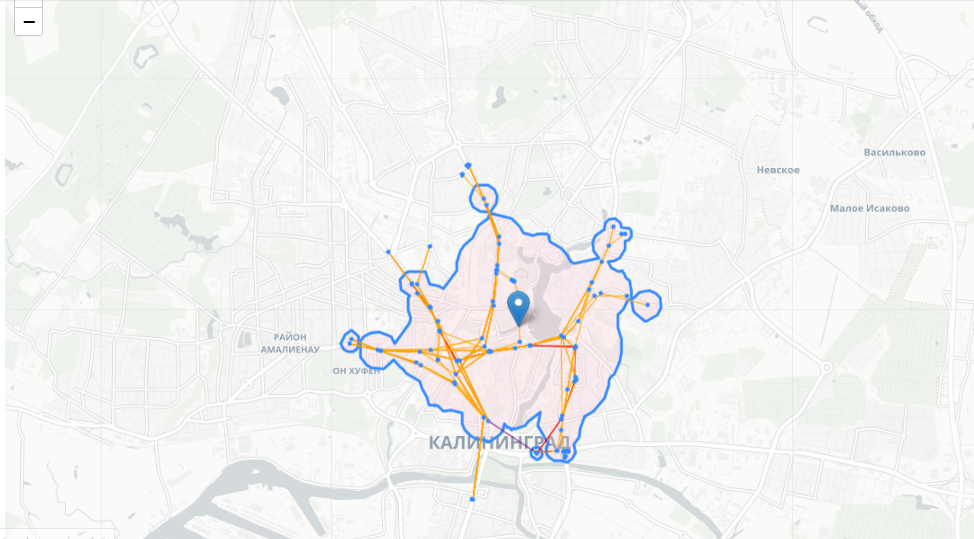

In [41]:
from IPython.display import Image, display
display(Image(filename='./src/2.png', embed=True))

In [42]:
pt_isochrone.to_file("pt_isochrone.geojson", driver="GeoJSON")
walk_isochrone.to_file("walk_isochrone.geojson", driver="GeoJSON")
drive_isochrone.to_file("drive_isochrone.geojson", driver="GeoJSON")
pt_stops.to_file("pt_stops.geojson", driver="GeoJSON")
pt_routes.to_file("pt_routes.geojson", driver="GeoJSON")